In this project, we will be acting as a data analyst for a company that sells books for learning programming. Our company has produced multiple books, and each has received many reviews. Our company wants us to check out the sales data and see if we can extract any useful information from it. We'll walk through this process as we progrses through this project.

For our R projects, we should be working with an RMarkdown file in our own RStudio. We can download the dataset [here](https://data.world/dataquest/book-reviews). `

We can refer to the suggested solutions [here](https://github.com/dataquestio/solutions/blob/master/Mission498Solutions.Rmd)

The first thing we should do before we do any analysis is to get acquainted with dataset. There are many, many things to check with a dataset before we dive into any analysis. How much data is there? What kind of data do we actually have on hand? Is there anything "weird" that might interfere with any analyses we might need to do? Is there missing data? Answering these questions saves our time and effort later.

If we don't check the data beforehand, it's easy to make some false assumptions about the data that can hinder our progress later. Maybe we think that one column looks like a number, but it's actually been read in as a string. Perhaps some things were misspelled. In any case, getting familiar with the data is our first step in the data analysis workflow. Here's a few helpful questions to start out any data analysis. Answer each of these questions for the sales dataset.

* Some of the questions can be answered with a `for` loop. 
* Other questions might incorporate control flow with an `if` statement.

For the most part, we will be using the [`if_else()` function](https://dplyr.tidyverse.org/reference/if_else.html) and [`case_when()` function](https://dplyr.tidyverse.org/reference/case_when.html) since we'll be dealing with data in tibbles, but it's still good to know the general control flow structure.

One of the instructions also asks about unique values in a column. If we have a vector that has duplicate values in it, we can see all of the unique values in it with the [`unique()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/unique.html). We show an example use below:

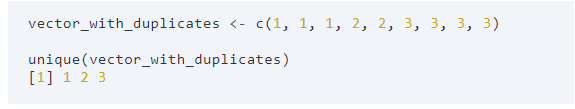

`library(tidyverse)
library(readr)
reviews <- read_csv("book_reviews.csv")`

### Getting Familiar With The Data

`# How big is the dataset?
dim(reviews)`

`# What are the column names?
colnames(reviews)`

`# What are the column types?
for (c in colnames(reviews)) {
  typeof(reviews[[c]])
}`

`# What are the unique values in each column?
for (c in colnames(reviews)) {
  print("Unique values in the column:")
  print(c)
  print(unique(reviews[[c]]))
  print("")
}`

All of the columns seem to contain strings. The `reviews` column represents what the score that the reviewer gave the book. The `book` column indicates which particular textbook was purchased. The `state` column represents the state where the book was purchased. The `price` column represents the price that the book was purchased for.

### Handling Missing Data

Now that we are more familiar with the data itself, now we can get into the more specific details of data analysis. A large part of a data analyst's job is to take a raw dataset and turn it into a form that we can use for analysis. Many times, we will not be able to just take a dataset and start analyzing it. It's good practice to examine the data beforehand and make note of any changes we need to make for it. This process has many names, but for future reference, we'll call it **data cleaning** or **data processing**.

The first issue we will contend with is the issue of missing data. Missing data is annoying because there's nothing we can really do with it. We can't perform any analysis or calculations with missing data. In R, missing data is typically shown with `NA`, which stands for **"not available"**. Some other datasets may convey missingness in a different way, but `NA` is the most common.

There are two ways that we can deal with missing data: 

1. Remove any rows or columns that have missing data (typically, rows) or 

2. Fill in the missing data in an informed, discipline way. 

This second way is known as **imputation**, and it's outside of the scope of what we've learned so far. For now, we'll take first approach with this dataset.

Recall from the Working With Tibbles that we can use a combination of the [`filter()` function](https://dplyr.tidyverse.org/reference/filter.html) and the [`is.na()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/NA.html) to remove rows that have missing data. `is.na()` will return `TRUE` or `FALSE` depending on if a value is `NA` or not. This makes it an excellent candidate to `filter()` on.

`complete_reviews = reviews %>% filter(!is.na(review))
dim(complete_reviews)`

There were about 200 reviews that were removed from the dataset. This is about 10% of the original dataset. This isn't too big of an amount, so we would feel comfortable continuing with our analysis.


### Dealing With Inconsistent Labels

Now that we've removed all of the missing data from the dataset, we have a **complete** dataset. This is the ideal case that we would like to start any data analysis, so we're working towards a better dataset already.

The next thing that we need to work on is the `state` column. We may have noticed that the labeling for each state is inconsistent. For example, California is written as both "California" and "CA". Both "California" and "CA" refer to the same place in the United States, so we should try to clean this up. We need to choose one of the ways to refer to the state, and stick to that convention. Making labels/strings more consistent in the data will make things easier to analyze later on.

If we're unfamiliar with the shortened postal codes of the states, we can refer to this helpful guide [here](https://www.factmonster.com/us/postal-information/state-abbreviations-and-state-postal-codes). It would be helpful to write down the relevant states in our RMarkdown for reference later if we forget, so we don't have to refer back to the site itself.

We'll use the shortened postal codes instead since they're shorter.

`# creating a new column `

`complete_reviews <- complete_reviews %>% 
  mutate(
    state = case_when(
      state == "California" ~ "CA",
      state == "New York" ~ "NY",
      state == "Texas" ~ "TX",
      state == "Florida" ~ "FL",
      TRUE ~ state # ignore cases where it's already postal code
    )
  )`

### Transforming The Review Data

The first things we'll handle in the dataset are the reviews themselves. We may have noticed in our data exploration that the reviews take the form of strings, ranging from "Poor" to "Excellent". Our goal is to evaluate the ratings of each of the textbooks, but there's not much we can do with text versions of the review scores. It would be better if we were to convert the reviews into a numerical form.

`Creating two (2) new column "review_num" and "is_high_review"`

`complete_reviews <- complete_reviews %>% 
  mutate(
    review_num = case_when(
      review == "Poor" ~ 1,
      review == "Fair" ~ 2,
      review == "Good" ~ 3,
      review == "Great" ~ 4,
      review == "Excellent" ~ 5
    ),
    is_high_review = if_else(review_num >= 4, TRUE, FALSE)
  )`


### Analyzing The Data

It's important to keep the overall goal in mind as we handle all the little details of the cleaning. We are acting as an analyst trying to figure out which books are the most profitable for the company. The initial data wasn't in a form that was ready for analysis, so we needed to do this cleaning to prepare it. A lot of analysts starting their first jobs believe that the analysis part of their job will be the bulk of their work. To the contrary, a lot of our work will focus on data cleaning itself, while by comparison the data analysis might only take a few lines.

With all of our data cleaning, now we're ready to do some analysis of the data. Our main goal is to figure out what book is the most profitable. How will we judge what the "most profitable" book is though? Our dataset represents customer purchases. One way to define "most profitable" might be to just choose the book that's purchased the most. Another way to define it would be to see how much money each book generates overall.

We'll define most profitable book in terms of how many books there was sold. 

`complete_reviews %>% 
  group_by(book) %>% 
  summarize(
    purchased = n()
  ) %>% 
  arrange(-purchased)`

The books are relatively well matched in terms of purchasing, but "Fundamentals of R For Beginners" has a slight edge over everyone else. 

After performing the cleaning and analysis, we might think that that's the end. Throughout the project, we should write some notes to ourself about exploring the data, cleaning it and analyzing it. Remember that we are performing this analysis for the benefit of the company that hired us, so they'll most likely be expecting some form of report from us. They're not going to do the analysis themselves, so we'll need to be able to explain everything that we did in our report and our findings.

Writing a report or creating some polished product after the analysis is important because we need to be able to **communicate** our findings to others. This is especially important when the people reading our analysis are not programmers themselves and will not be able to understand the code that we wrote for it. Take some time to organize our notes into a small report. This report doesn't need to be a long essay! It only need to communicate the answer to our company's question: "What's our most profitable book?" There are several sub-questions that might need to be answered along with this question like, "How do we know it's the most profitable?" or "How did we calculate our measure for profitability"? Our report is just trying to demonstrate that we have an answer and that we gave some thought on how to get to this answer.

Aside from our hypothetical situation, writing a good report can help show future employers that we are able to think both programmatically and communicate well. For any future analysis we might do, having a polished final product that can be easily read will always be looked up favorably.

A good, common way to structure a report is into three parts: Introduction, Findings, Conclusion

* `Introduction`: What motivated our analysis? What kind of data do we have? What is the main question we're trying to answer?
* `Findings`: What did we need to do to the data to do our analysis? What things are we calculating to answer our main question?
* `Conclusion`: What is the answer to our main question? Was there anything that we feel limits our analysis? What should the reader do with our findings?